<a href="https://colab.research.google.com/github/sayali1004/image_classification-/blob/main/Image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
img = cv2.imread('/content/drive/MyDrive/CelebrityFaceRecognition/model/test_images/sharapova1.jpg')
img.shape

(555, 700, 3)

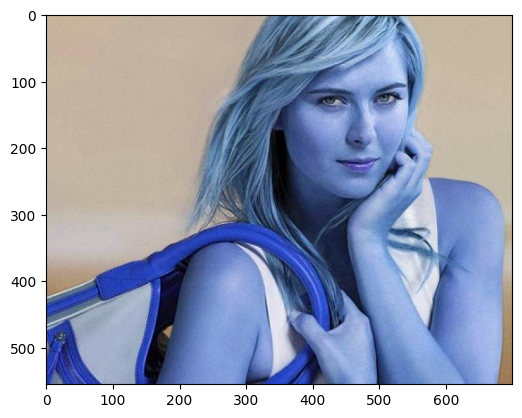

In [ ]:
plt.imshow(img)

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(555, 700)

array([[175, 175, 175, ..., 176, 175, 174],
       [175, 175, 175, ..., 177, 175, 174],
       [175, 175, 175, ..., 177, 176, 174],
       ...,
       [ 84,  87,  88, ..., 113, 113, 113],
       [ 88,  89,  90, ..., 113, 113, 113],
       [ 93,  91,  91, ..., 112, 112, 112]], dtype=uint8)
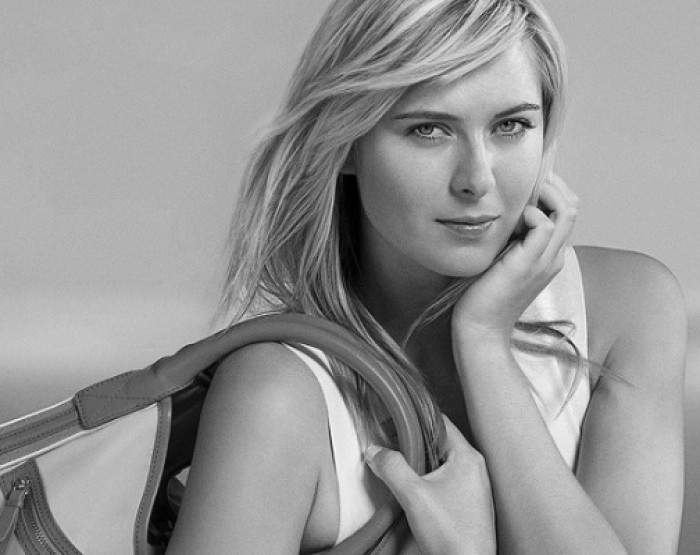

In [ ]:

gray

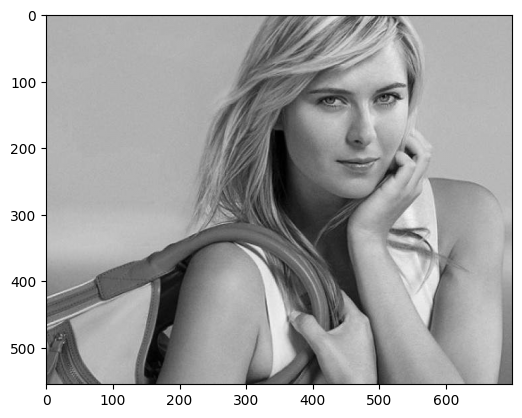

In [ ]:

plt.imshow(gray, cmap='gray')

In [ ]:
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_eye.xml

import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

# ... (rest of your code) ...

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml') # Updated path
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml') # Updated path

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

--2025-01-19 23:18:04--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml.1’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.06s   

2025-01-19 23:18:04 (13.9 MB/s) - ‘haarcascade_frontalface_default.xml.1’ saved [930127/930127]

--2025-01-19 23:18:04--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_eye.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443.

array([[352,  38, 233, 233]], dtype=int32)

In [ ]:
(x,y,w,h) = faces[0]
x,y,w,h

(352, 38, 233, 233)

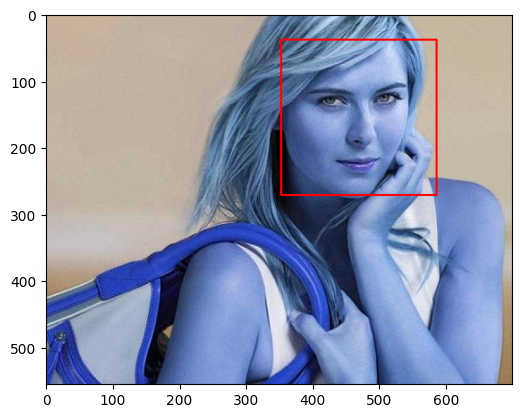

In [ ]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

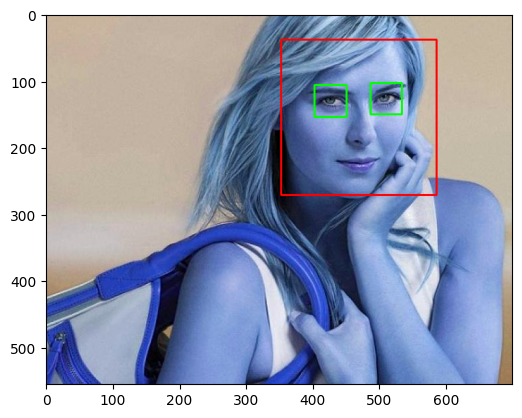

In [ ]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)


plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Example image loading (substitute with your actual image)
img = Image.open('your_image.jpg')  # Load an image with PIL
roi_color = np.array(img)  # Convert to numpy array

# Check dtype of image data
print(f"Original dtype: {roi_color.dtype}")

# If dtype is object, convert to a proper numeric type
if roi_color.dtype == 'object':
    roi_color = roi_color.astype(np.uint8)  # Or np.float32 depending on the image type

# Check dtype again after conversion
print(f"Converted dtype: {roi_color.dtype}")

# Plot the image
plt.imshow(roi_color, cmap='gray')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'your_image.jpg'

In [ ]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

In [ ]:
cropped_img = np.array(roi_color)
cropped_img.shape

()

In [ ]:
import numpy as np
import pywt
import cv2

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)
    imArray /= 255;
    # compute coefficients
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)
    coeffs_H[0] *= 0;

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

In [ ]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')


NameError: name 'cropped_img' is not defined

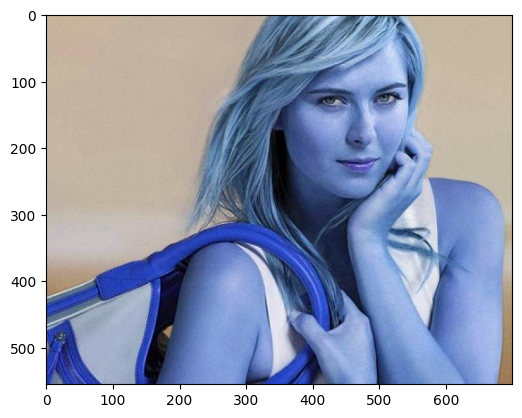

In [ ]:
original_image = cv2.imread('/content/drive/MyDrive/CelebrityFaceRecognition/model/test_images/sharapova1.jpg')
plt.imshow(original_image)

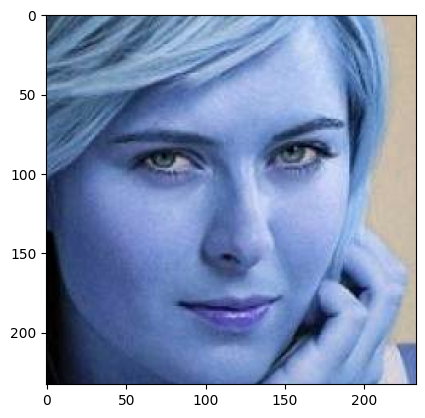

In [ ]:
cropped_image = get_cropped_image_if_2_eyes('/content/drive/MyDrive/CelebrityFaceRecognition/model/test_images/sharapova1.jpg')
plt.imshow(cropped_image)

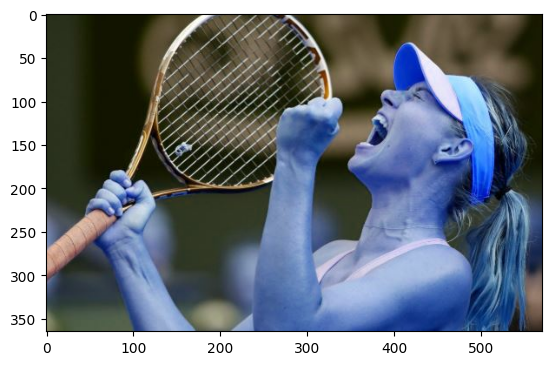

In [ ]:
org_image_obstructed = cv2.imread('/content/drive/MyDrive/CelebrityFaceRecognition/model/test_images/sharapova2.JPG')
plt.imshow(org_image_obstructed)

In [ ]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('/content/drive/MyDrive/CelebrityFaceRecognition/model/test_images/sharapova2.JPG')
cropped_image_no_2_eyes

In [ ]:
path_to_data = "/content/drive/MyDrive/CelebrityFaceRecognition/model/dataset"
path_to_cr_data = "/content/drive/MyDrive/CelebrityFaceRecognition/model/dataset/cropped/"

In [ ]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [ ]:
img_dirs

['/content/drive/MyDrive/CelebrityFaceRecognition/model/dataset/serena_williams',
 '/content/drive/MyDrive/CelebrityFaceRecognition/model/dataset/roger_federer',
 '/content/drive/MyDrive/CelebrityFaceRecognition/model/dataset/lionel_messi',
 '/content/drive/MyDrive/CelebrityFaceRecognition/model/dataset/virat_kohli',
 '/content/drive/MyDrive/CelebrityFaceRecognition/model/dataset/maria_sharapova',
 '/content/drive/MyDrive/CelebrityFaceRecognition/model/dataset/cropped']

In [ ]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [ ]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir() and entry.name != 'cropped': # Exclude the 'cropped' directory
        img_dirs.append(entry.path)

In [ ]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)

    celebrity_file_names_dict[celebrity_name] = []

    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)

            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name

            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

serena_williams
Generating cropped images in folder:  /content/drive/MyDrive/CelebrityFaceRecognition/model/dataset/cropped/serena_williams
roger_federer
Generating cropped images in folder:  /content/drive/MyDrive/CelebrityFaceRecognition/model/dataset/cropped/roger_federer
lionel_messi
Generating cropped images in folder:  /content/drive/MyDrive/CelebrityFaceRecognition/model/dataset/cropped/lionel_messi
virat_kohli
Generating cropped images in folder:  /content/drive/MyDrive/CelebrityFaceRecognition/model/dataset/cropped/virat_kohli
maria_sharapova
Generating cropped images in folder:  /content/drive/MyDrive/CelebrityFaceRecognition/model/dataset/cropped/maria_sharapova


In [ ]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict


{'serena_williams': ['/content/drive/MyDrive/CelebrityFaceRecognition/model/dataset/cropped/serena_williams/serena_williams1.png',
  '/content/drive/MyDrive/CelebrityFaceRecognition/model/dataset/cropped/serena_williams/serena_williams2.png',
  '/content/drive/MyDrive/CelebrityFaceRecognition/model/dataset/cropped/serena_williams/serena_williams3.png',
  '/content/drive/MyDrive/CelebrityFaceRecognition/model/dataset/cropped/serena_williams/serena_williams4.png',
  '/content/drive/MyDrive/CelebrityFaceRecognition/model/dataset/cropped/serena_williams/serena_williams5.png',
  '/content/drive/MyDrive/CelebrityFaceRecognition/model/dataset/cropped/serena_williams/serena_williams6.png',
  '/content/drive/MyDrive/CelebrityFaceRecognition/model/dataset/cropped/serena_williams/serena_williams7.png',
  '/content/drive/MyDrive/CelebrityFaceRecognition/model/dataset/cropped/serena_williams/serena_williams8.png',
  '/content/drive/MyDrive/CelebrityFaceRecognition/model/dataset/cropped/serena_willi

In [ ]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict


{'serena_williams': 0,
 'roger_federer': 1,
 'lionel_messi': 2,
 'virat_kohli': 3,
 'maria_sharapova': 4}

In [ ]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

NameError: name 'w2d' is not defined

In [ ]:
!pip install pywavelets
import pywt

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)
    imArray /= 255;
    # compute coefficients
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)
    coeffs_H[0] = np.zeros(coeffs_H[0].shape)

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 32.3 MB/s eta 0:00:00


In [ ]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [ ]:
len(X[0])

4096

In [ ]:
32*32*3 + 32*32

4096

In [ ]:
X[0]

array([[ 15],
       [ 21],
       [ 46],
       ...,
       [213],
       [  0],
       [  0]], dtype=uint8)

In [ ]:
y[0]

0

In [ ]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(187, 4096)

##Modeling

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7872340425531915

In [ ]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.70      0.78      0.74         9
           1       1.00      0.57      0.73         7
           2       0.71      0.62      0.67         8
           3       0.80      0.86      0.83        14
           4       0.82      1.00      0.90         9

    accuracy                           0.79        47
   macro avg       0.81      0.77      0.77        47
weighted avg       0.80      0.79      0.78        47



##Let's use GridSearch to try out different models with different paramets. Goal is to come up with best model with best fine tuned parameters


In [ ]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [ ]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [ ]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_

df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

,model,best_score,best_params
0,svm,0.800000,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.635714,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.821429,{'logisticregression__C': 1}


In [ ]:

best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, multi_class='auto',
                                     solver='liblinear'))])}

In [ ]:
best_estimators['svm'].score(X_test,y_test)

0.7872340425531915

In [ ]:
best_estimators['random_forest'].score(X_test,y_test)

0.5957446808510638

In [ ]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.7872340425531915

In [ ]:
from sklearn.metrics import confusion_matrix

# Assuming you want to use the best SVM model for the confusion matrix:
best_clf = best_estimators['svm']  # Assign the best SVM model to best_clf

cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 8,  0,  1,  0,  0],
       [ 2,  4,  0,  0,  1],
       [ 1,  0,  5,  2,  0],
       [ 1,  1,  1, 11,  0],
       [ 0,  0,  0,  0,  9]])

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 8,  0,  1,  0,  0],
       [ 2,  4,  0,  0,  1],
       [ 1,  0,  5,  2,  0],
       [ 1,  1,  1, 11,  0],
       [ 0,  0,  0,  0,  9]])

Text(95.72222222222221, 0.5, 'Truth')

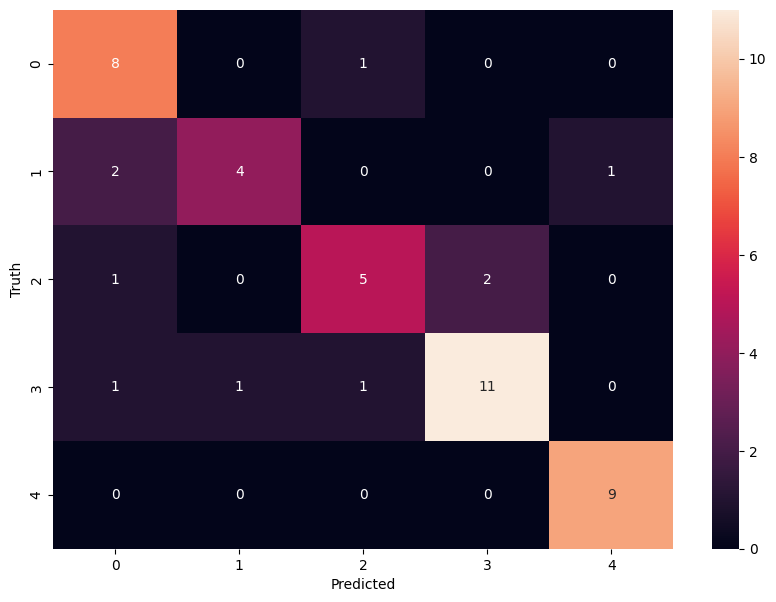

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [ ]:
class_dict

{'serena_williams': 0,
 'roger_federer': 1,
 'lionel_messi': 2,
 'virat_kohli': 3,
 'maria_sharapova': 4}

##Save the trained model

In [ ]:
!pip install joblib
import joblib
# Save the model as a pickle in a file
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

##Save class dictionary

In [ ]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))